# MSDS 430 Mini Project 2

#### In this assignment you will complete the following exercises and submit your notebook (ipynb file) to Canvas. Your file should include all output, i.e. run each cell and save your file before submitting.

<font color=green> In this second mini project we begin working with another Python library that is used quite often in data science, Pandas. Pandas provides us with more extensive ways to work with data as multidimensional array objects. As you read through the Pandas documentation, you are encouraged to explore other capabilities beyond what is required for this assignment. You will want to try to expand your knowledge by exploring the Pandas documentation to learn more about the possibilities for future reference. In this assignment you will be reading in some data using Pandas and providing information related to that data. </font>

Step 1: Use pandas to read the file Employee_Data.xlsx.

In [124]:
import pandas as pd
import numpy as np

employees = pd.read_excel('Employee_Data.xlsx')
employees

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


Step 2: Inspect the data by printing the first five rows and the last five rows in the dataframe.

In [125]:
print(employees.head())
print(employees.tail())

   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

           ...           RelationshipSatisfaction StandardHours  \
0      

Step 3: Display the 5 employees who have been at the company the longest in descending order.

In [126]:
employees_sorted = employees.sort_values(by = 'YearsAtCompany', ascending = False)
print(employees_sorted.head())

      Age Attrition BusinessTravel  DailyRate              Department  \
126    58       Yes  Travel_Rarely        147  Research & Development   
98     58        No  Travel_Rarely        682                   Sales   
1116   55        No  Travel_Rarely        685                   Sales   
270    55        No  Travel_Rarely        452  Research & Development   
561    52        No  Travel_Rarely        621                   Sales   

      DistanceFromHome  Education EducationField  EmployeeCount  \
126                 23          4        Medical              1   
98                  10          4        Medical              1   
1116                26          5      Marketing              1   
270                  1          3        Medical              1   
561                  3          4      Marketing              1   

      EmployeeNumber          ...           RelationshipSatisfaction  \
126              165          ...                                  4   
98            

Step 4: Create a new panda series with employee number as the index and job satisfaction as the data. The categories for job satisfaction are 1 = Low, 2 = Medium, 3 = High, 4 = Very High. Inspect your series by displaying the first four records.

In [127]:
job_satisfaction = pd.Series(employees['JobSatisfaction'].values, index = employees['EmployeeNumber'])
print(job_satisfaction[:4])


EmployeeNumber
1    4
2    2
4    3
5    3
dtype: int64


Step 5: Summarize job satisfaction for the company by displaying the number of employees in each category.

In [128]:
grouped = employees.groupby('JobSatisfaction')
job_satisfaction_count = grouped['EmployeeNumber'].agg(np.size)
print(job_satisfaction_count)



JobSatisfaction
1    289
2    280
3    442
4    459
Name: EmployeeNumber, dtype: int64


Step 6: Display the percentages in each category.

In [129]:
total_count = len(employees.index)

satisfaction_pcts = job_satisfaction_count.groupby(level=0).apply(lambda x:
                                                 x / total_count * 100)

print(satisfaction_pcts)

JobSatisfaction
1    19.659864
2    19.047619
3    30.068027
4    31.224490
Name: EmployeeNumber, dtype: float64


Step 7: Create a bar plot of the numbers from Step 5

AxesSubplot(0.125,0.125;0.775x0.755)


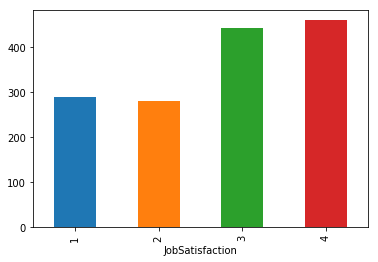

In [131]:
job_satisfaction_bar = job_satisfaction_count.plot.bar()

print(job_satisfaction_bar)